In [1]:
!wget -nc "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/067/435/original/booking.csv"

File ‘booking.csv’ already there; not retrieving.



In [2]:
import pandas as pd
df = pd.read_csv('booking.csv')

df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


## D98Q1

In [3]:
len(df[(df['no_of_adults']==0) & (df['no_of_children']==0)])

16

In [4]:
import calendar
calendar.month_name[2]

'February'

## D98Q2

<Axes: >

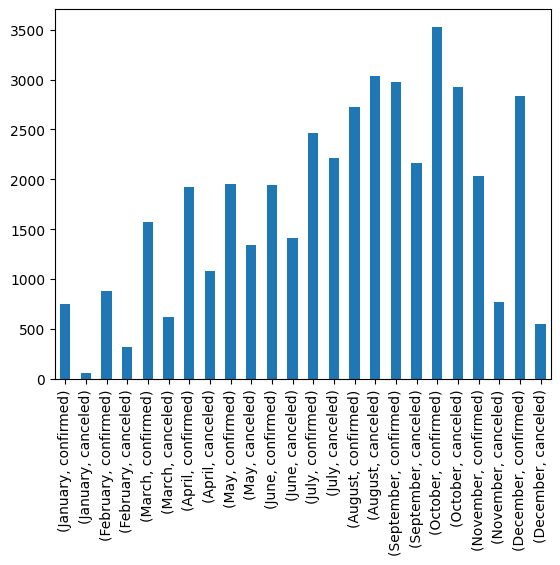

In [5]:
s_ambs = df.groupby(['arrival_month', 'booking_status']).count()['id']
bookings = ['confirmed', 'canceled']
s_ambs.index = pd.MultiIndex.from_tuples([(calendar.month_name[idx[0]], bookings[idx[1]]) for idx in s_ambs.index])
s_ambs.plot.bar()

## D98Q4

In [6]:
def process1(df: pd.DataFrame):
    # copy
    df_p = df[['arrival_year', 'arrival_month', 'arrival_date']].copy(deep=True)
    df_p.columns = ['year', 'month', 'day']
    # change names
    
    # create dt object
    df_p.loc[:, 'date'] = pd.to_datetime(df_p, errors='coerce')
    df_p.drop(['year', 'month', 'day'], axis='columns', inplace=True)
    # extract 'week', 'day', 'dayofweek', 'quarter', and 'dayofyear'.
    df_p.loc[:, 'dayofweek']    = df_p['date'].dt.day_of_week
    df_p.loc[:, 'week']         = df_p['date'].dt.isocalendar().week.astype(float)
    df_p.loc[:, 'quarter']      = df_p['date'].dt.quarter
    df_p.loc[:, 'dayofyear']    = df_p['date'].dt.day_of_year
    df_p.loc[:, 'year']         = df_p['date'].dt.year
    df_p.loc[:, 'month']        = df_p['date'].dt.month
    df_p.loc[:, 'day']          = df_p['date'].dt.day
    df_p.drop(['date'], axis='columns', inplace=True)
    return df_p

process1(df).isna().sum()

dayofweek    50
week         50
quarter      50
dayofyear    50
year         50
month        50
day          50
dtype: int64

## D98Q5

In [9]:
Target = 'booking_status'
X = df.drop(Target, axis = 1)
y = df[Target]

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize weights
weights = np.ones(len(X)) / len(X)

# Train first weak learner
dt1 = DecisionTreeClassifier(random_state=10, max_depth=1)
dt1.fit(X, y)
y_pred_1 = dt1.predict(X)

# Update weights function
def update_weights(y, y_pred, weights):
    for i in range(len(weights)):
        if y[i] != y_pred[i]: # Hint: If actual value is not same as predicted value.
            weights[i] *= 1.5  # Increase the weight for misclassified instances
        else:
            weights[i] *= 0.5  # Decrease the weight for correctly classified instances
    return weights / np.sum(weights)  # Normalize the weights

# Apply first learner and update weights
weights = update_weights(y, __2__, weights) # Hint: update weights using actual and predicted.

# Train second weak learner
dt2 = DecisionTreeClassifier(random_state=10, max_depth=1)
dt2.fit(X, y, sample_weight= __3__)   # Utilize updated weights for learning for this sample_weight is used.
y_pred_2 = dt2.predict(X)

# Combine the weak learners' predictions
# Assuming a simple average for combination of both the predictions
final_prediction = np.round((y_pred_1 + __4__) / 2.0).astype(int)

# Calculate the accuracy
final_accuracy = accuracy_score(y, final_prediction)
print(f"Final combined prediction accuracy: {final_accuracy}")